In [26]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.insert(0, "../")

import motiflets.motiflets as ml
from motiflets.competitors import *
import motiflets.plotting as ml_plt

import subprocess
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
df1 = pd.read_csv("../tests/results/motion_precision.csv", index_col=0)
df2 = pd.read_csv("../tests/results/birdsounds_precision.csv", index_col=0)
df3 = pd.read_csv("../tests/results/soundtracks_precision.csv", index_col=0)
df4 = pd.read_csv("../tests/results/audio_precision.csv", index_col=0)
df = pd.concat([df1, df2, df3, df4])
df.reset_index(inplace=True, drop=True)
df

,Dataset,Method,Precision,Recall
0,Boxing,mSTAMP+MDL,1.0000,0.2
1,Boxing,mSTAMP,1.0000,0.2
2,Boxing,LAMA,0.9000,0.9
3,Boxing,LAMA (naive),0.8000,0.8
4,Boxing,EMD*,0.8000,0.8
...,...,...,...,...
72,Queen David Bowie - Under Pressure,LAMA,0.8125,1.0
73,Queen David Bowie - Under Pressure,LAMA (naive),0.8125,1.0
74,Queen David Bowie - Under Pressure,EMD*,0.3125,1.0
75,Queen David Bowie - Under Pressure,K-Motifs (TOP-f),0.7500,1.0


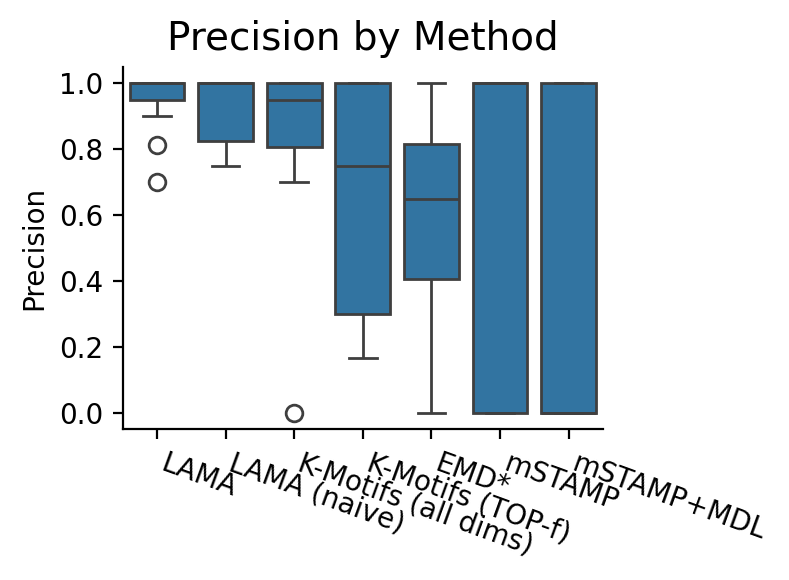

In [34]:
df.Method[df.Method == "K-Motifs (TOP-N)"] = "K-Motifs (TOP-f dims)"
df.Method[df.Method == "K-Motifs (all)"] = "K-Motifs (all dims)"

fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(x=df.Method, y=df.Precision, ax=ax, 
            order=df[["Method", "Precision"]].groupby("Method").mean().sort_values(by="Precision", ascending=False).reset_index()["Method"])
ax.set_title("Precision by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/boxplot_precision.pdf")

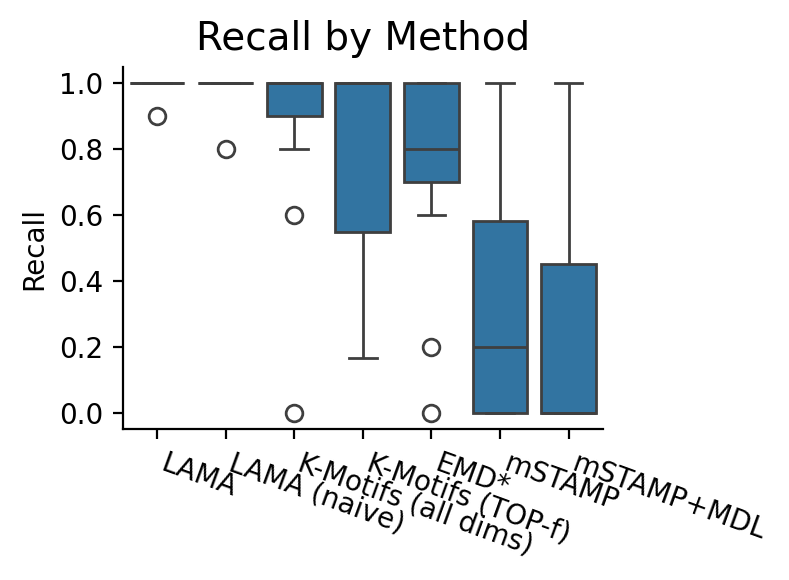

In [35]:
fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(x=df.Method, y=df.Recall, ax=ax, 
            order=df[["Method", "Recall"]].groupby("Method").mean().sort_values(by="Recall", ascending=False).reset_index()["Method"])
ax.set_title("Recall by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/boxplot_recall.pdf")

In [42]:
print(df.groupby(df.Method)[["Precision", "Recall"]].agg(["mean", "median"]))

                    Precision           Recall       
                         mean median      mean median
Method                                               
EMD*                 0.608712   0.65  0.745455    0.8
K-Motifs (TOP-f)     0.651515   0.75  0.751515    1.0
K-Motifs (all dims)  0.826894   0.95  0.854545    1.0
LAMA                 0.946591   1.00  0.990909    1.0
LAMA (naive)         0.926894   1.00  0.981818    1.0
mSTAMP               0.545455   1.00  0.342424    0.2
mSTAMP+MDL           0.454545   0.00  0.251515    0.0


In [43]:
print(df.groupby(df.Method)[["Precision", "Recall"]].agg(["mean", "median"]).to_latex())

\begin{tabular}{lrrrr}
\toprule
 & \multicolumn{2}{r}{Precision} & \multicolumn{2}{r}{Recall} \\
 & mean & median & mean & median \\
Method &  &  &  &  \\
\midrule
EMD* & 0.608712 & 0.650000 & 0.745455 & 0.800000 \\
K-Motifs (TOP-f) & 0.651515 & 0.750000 & 0.751515 & 1.000000 \\
K-Motifs (all dims) & 0.826894 & 0.950000 & 0.854545 & 1.000000 \\
LAMA & 0.946591 & 1.000000 & 0.990909 & 1.000000 \\
LAMA (naive) & 0.926894 & 1.000000 & 0.981818 & 1.000000 \\
mSTAMP & 0.545455 & 1.000000 & 0.342424 & 0.200000 \\
mSTAMP+MDL & 0.454545 & 0.000000 & 0.251515 & 0.000000 \\
\bottomrule
\end{tabular}



In [37]:
datasets = ["common-starling-sturnus-vulgaris.csv",
"Lord-of-the-Rings-Symphony-The-Shire.csv",
"Star_Wars_The_Imperial_March_Theme_Song.csv",
"The-Rolling-Stones-Paint-It-Black.csv",
"Numb-Linkin-Park.csv",
"Queen-David-Bowie-Under-Pressure.csv",
"Vanilla_Ice-Ice_Ice_Baby.csv",
"What-I-ve-Done-Linkin-Park.csv"]

In [38]:
for d in datasets:
    df2 = pd.read_csv("../datasets/audio/"+d, index_col=0, compression='gzip')
    print(d, df2.shape)

common-starling-sturnus-vulgaris.csv (20, 2839)
Lord-of-the-Rings-Symphony-The-Shire.csv (20, 6487)
Star_Wars_The_Imperial_March_Theme_Song.csv (20, 8015)
The-Rolling-Stones-Paint-It-Black.csv (20, 9744)
Numb-Linkin-Park.csv (20, 8018)
Queen-David-Bowie-Under-Pressure.csv (20, 9305)
Vanilla_Ice-Ice_Ice_Baby.csv (20, 11693)
What-I-ve-Done-Linkin-Park.csv (20, 8932)


In [39]:
df[("LAMA" == df.Method) | ("LAMA (naive)" == df.Method)]

,Dataset,Method,Precision,Recall
2,Boxing,LAMA,0.900000,0.9
3,Boxing,LAMA (naive),0.800000,0.8
9,Swordplay,LAMA,1.000000,1.0
10,Swordplay,LAMA (naive),1.000000,1.0
16,Basketball,LAMA,1.000000,1.0
17,Basketball,LAMA (naive),1.000000,1.0
23,Charleston - Side By Side Female,LAMA,1.000000,1.0
24,Charleston - Side By Side Female,LAMA (naive),1.000000,1.0
30,Common-Starling,LAMA,1.000000,1.0
31,Common-Starling,LAMA (naive),1.000000,1.0
